In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# checkin data analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
checkin_data=pd.read_csv("/content/drive/MyDrive/checkin_final.csv")

In [ ]:
checkin_data.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [ ]:
range(0,checkin_data.shape[0])

range(0, 131930)

In [ ]:
checkin_data['total'] = [len(checkin_data.iloc[i,1]) for i in range(0,131930)]

<ipython-input-8-92395a7c12d5>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])


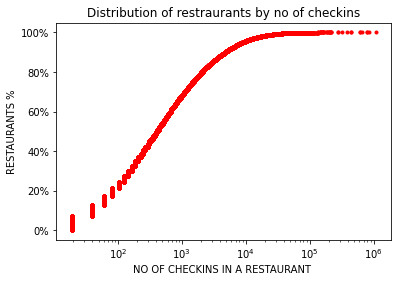

In [ ]:

x = np.sort(checkin_data.total)  #sort array to use as the x axis    
y = np.arange(1, len(checkin_data.total)+1)/len(checkin_data.total) 
ax = plt.subplot()
ax.plot(x, y, marker = '.', linestyle='none', color='r');
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
plt.xscale('log');
plt.xlabel('NO OF CHECKINS IN A RESTAURANT ');
plt.ylabel('RESTAURANTS %');
plt.title('Distribution of restraurants by no of checkins');

Above plot shows that Half of the restaurants have less than 20 checkins, even less than the reviews .

In [ ]:
# user data analysis
user=pd.read_csv("/content/drive/MyDrive/user_final (1).csv")

In [ ]:
user.columns

Index(['review_count', 'compliment_profile', 'compliment_plain', 'elite',
       'compliment_funny', 'average_stars', 'compliment_writer', 'fans',
       'compliment_photos', 'compliment_cool', 'name', 'compliment_note',
       'user_id', 'compliment_more', 'useful', 'compliment_hot', 'cool',
       'compliment_cute', 'friends', 'yelping_since', 'compliment_list',
       'funny'],
      dtype='object')

In [ ]:
user.shape

(1987897, 22)

In [ ]:
# Getting the Users(Yelpers) based on review counts
review_total = user.sort_values(by='review_count',ascending=True)

# Getting the Users based on number of fans
fans = user.sort_values(by='fans',ascending=True)

# Getting the Users based on number of total friends on yelp
user['total_friends'] = [(user.iloc[i,1]) for i in range(0,1987897)]
friends = user.sort_values(by='total_friends',ascending=True)

# Getting the Users based on number of useful reviews 
useful = user.sort_values(by='useful',ascending=True)

Text(0, 0.5, 'number of reviews')

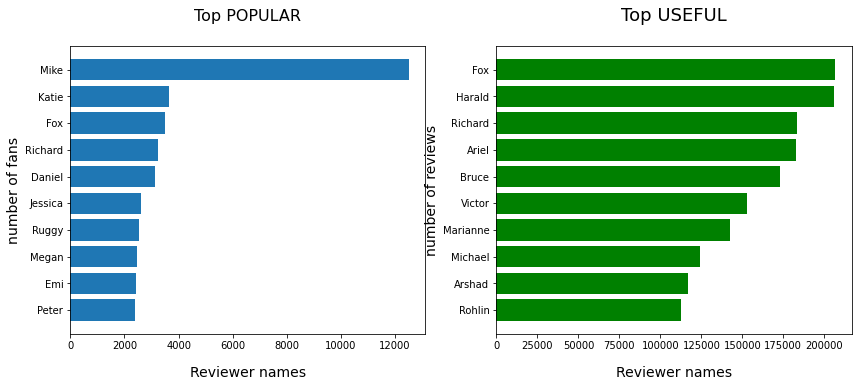

In [ ]:
import matplotlib.gridspec as gridspec

gridspec.GridSpec(3,2)
plt.figure(figsize=(14,18)) 

# Plotting the most popular reviewers based on the count of their fans
plt.subplot2grid((3,2), (0,0))
plt.barh(fans['name'][-10:],fans['fans'][-10:])


plt.title('Top POPULAR',fontsize=16, pad=25.0) 
plt.xlabel('Reviewer names', fontsize=14, labelpad=15.0)
plt.ylabel('number of fans', fontsize=14)

plt.subplot2grid((3,2), (0,1))
plt.barh(useful['name'][-10:],useful['useful'][-10:],color='green')

plt.title('Top USEFUL',fontsize=18, pad=25.0) 
plt.xlabel('Reviewer names', fontsize=14, labelpad=15.0)
plt.ylabel('number of reviews', fontsize=14)


<ipython-input-14-d0b6925c2161>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(['{:.0%}'.format(x) for x in ax3.get_yticks()])


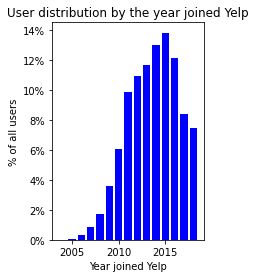

In [ ]:
# user distribution by the year they joined Yelp
import re
yr_joined = user.yelping_since.apply(lambda x: re.findall('^\d{4}',x)[0]).astype(int) # extract the year from the date string
ax3 = plt.subplot(1,2,2)
yr_joined.plot(kind='hist',density=True,bins=15,range=(2003.5,2018.5),rwidth=0.8, color='blue',ax=ax3);
ax3.set_yticklabels(['{:.0%}'.format(x) for x in ax3.get_yticks()])
ax3.set_xlabel('Year joined Yelp');
ax3.set_ylabel('% of all users');
ax3.set_title('User distribution by the year joined Yelp');

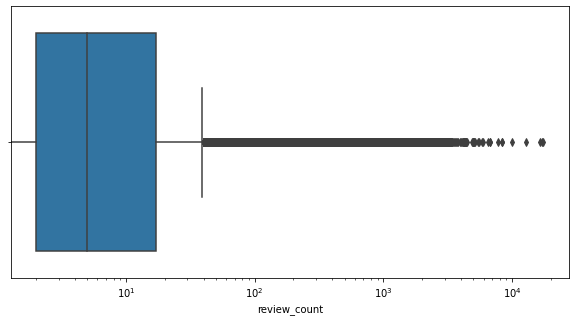

In [ ]:
#plot for review count
plt.figure(figsize=(10,5))
ax = plt.gca()
sns.boxplot(data=user, x='review_count', ax=ax)
plt.xscale('log')


The boxplot for review count reveals a lot of outliers. There are some users who have written over 10k reviews.

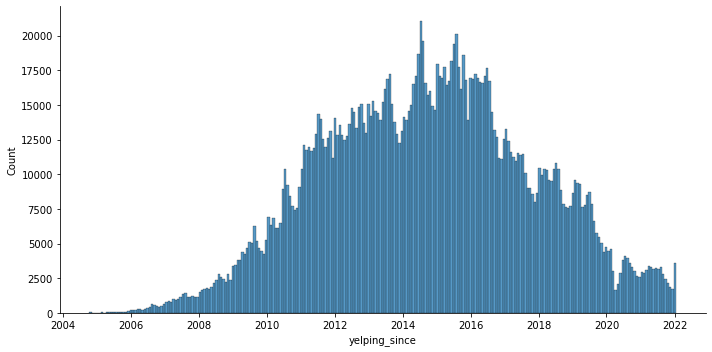

In [ ]:
# to find the time of use of yelp
user.yelping_since = pd.to_datetime(user.yelping_since)
sns.displot(data=user, x='yelping_since', aspect=2)

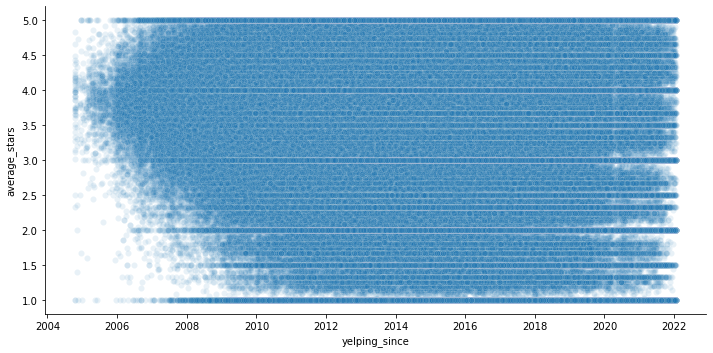

In [ ]:
sns.relplot(data=user, x='yelping_since', y='average_stars',alpha=.1, aspect=2)




*  There have been increase in users after 2010

*   Overtime users become less harsh reviewers.


*   We see that reviewers who have been yelping for long have higher avg rating.




TIP DATA ANALYSIS

In [ ]:
tip=pd.read_csv('/content/drive/MyDrive/tip_final.csv')

In [ ]:
tip.head()

,user_id,compliment_count,business_id,text,date
0,AGNUgVwnZUey3gcPCJ76iw,0,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21
1,NBN4MgHP9D3cw--SnauTkA,0,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10
2,-copOvldyKh1qr-vzkDEvw,0,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08
3,FjMQVZjSqY8syIO-53KFKw,0,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38
4,ld0AperBXk1h6UbqmM80zw,0,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09


In [ ]:
tip.columns

Index(['user_id', 'compliment_count', 'business_id', 'text', 'date'], dtype='object')

In [ ]:
review_data=pd.read_csv("/content/drive/MyDrive/yelp_review_final.csv")

In [ ]:
review_data.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

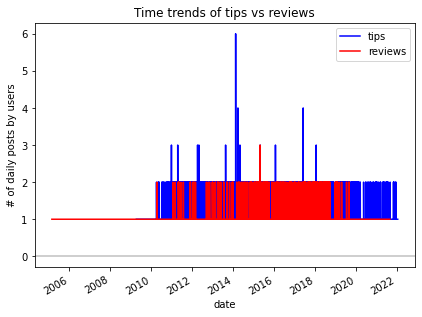

In [ ]:
plt.figure(figsize=(15,5))

# plot time trend for daily tips vs daily reviews
ax1 = plt.subplot(1,2,1)
tip['date'] = pd.to_datetime(tip.date, format='%Y-%m-%d')
tip.groupby('date')['text'].count().plot(color='blue', ax=ax1);
review_data['date'] = pd.to_datetime(review_data.date, format='%Y-%m-%d')
review_data.groupby('date')['text'].count().plot(color='red', ax=ax1);

ax1.axhline(y=0, color='grey',alpha=0.5);
ax1.set_ylabel('# of daily posts by users');
ax1.legend(['tips','reviews']);
ax1.set_title('Time trends of tips vs reviews');

the popularity of tips  does not increase in the first four years and slowly dives down afterward. Overall, tip is not as popular as review.

In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/yelp_review_final.csv")
df2.date = pd.to_datetime(df2.date)
df2['day'] = df2.date.dt.day
df2['month'] = df2.date.dt.month
df2['year'] = df2.date.dt.year
df2['hour'] = df2.date.dt.hour
df2['minute'] = df2.date.dt.minute
df2['second'] = df2.date.dt.second

df2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,day,month,year,hour,minute,second
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,7,7,2018,22,9,11
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,5,2,2014,20,30,30
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,4,1,2015,0,1,3
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,14,1,2017,20,54,15
4,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,23,9,2015,23,10,31


Text(0.5, 1.0, 'Number of reviews by Year')

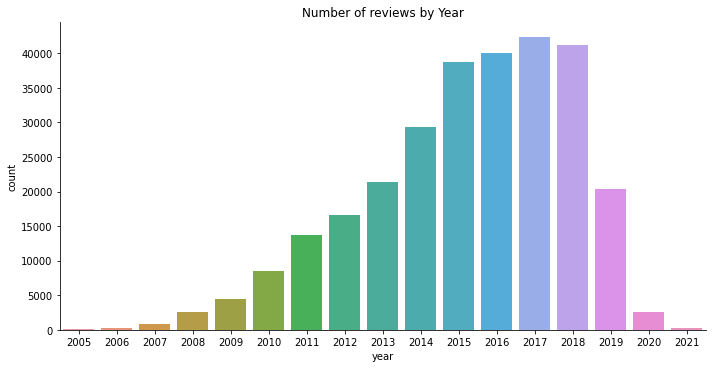

In [ ]:
g = sns.catplot(data=df2, x='year', kind='count', aspect=2)
ax = plt.gca()
ax.set_title('Number of reviews by Year')

Text(0.5, 1.0, 'Review Time')

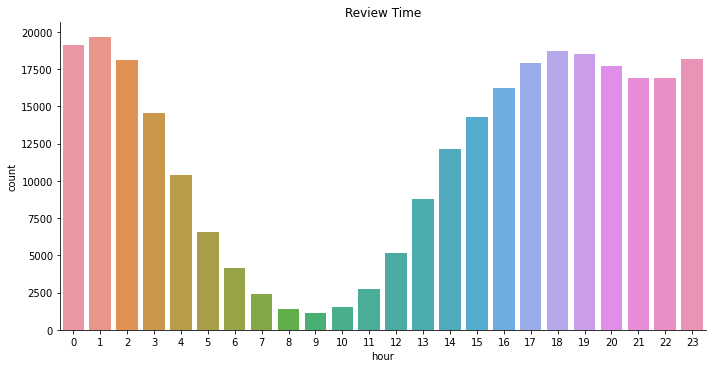

In [ ]:
sns.catplot(data=df2, x='hour', aspect=2, kind='count')
ax = plt.gca()
ax.set_title('Review Time')

In [ ]:
# business data
buss_df=pd.read_csv('/content/drive/MyDrive/business_final.csv')

<ipython-input-30-7c2498aa3cf7>:2: DtypeWarning: Columns (54,58) have mixed types. Specify dtype option on import or set low_memory=False.
  buss_df=pd.read_csv('/content/drive/MyDrive/business_final.csv')


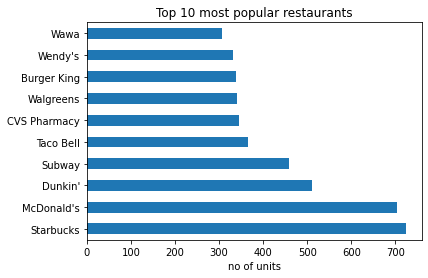

In [ ]:
# ten most popular restaurant names
buss_df.name.value_counts()[:10].plot(kind='barh');
plt.xlabel('no of units');
plt.title('Top 10 most popular restaurants');

<Axes: xlabel='City', ylabel='Count'>

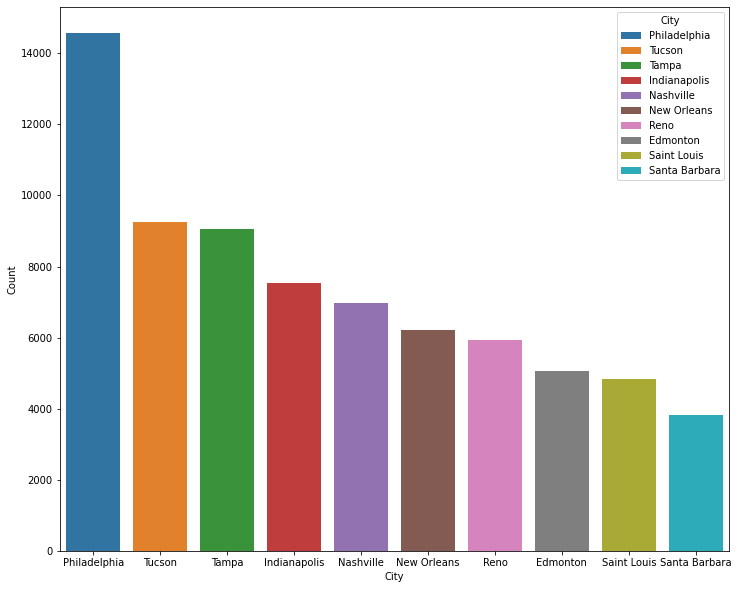

In [ ]:
# top 10 cities having restaurants
top_cities = buss_df['city'].value_counts().head(10)
top_city_df = pd.DataFrame(data=top_cities)
top_city_df.reset_index(level=0, inplace=True)
top_city_df.rename(columns = {'index':'City','city':'Count'}, inplace = True)
fig,ax= plt.subplots(figsize=(12,10))
sns.barplot(x="City",y='Count',hue='City',data=top_city_df,ax=ax,dodge=False)

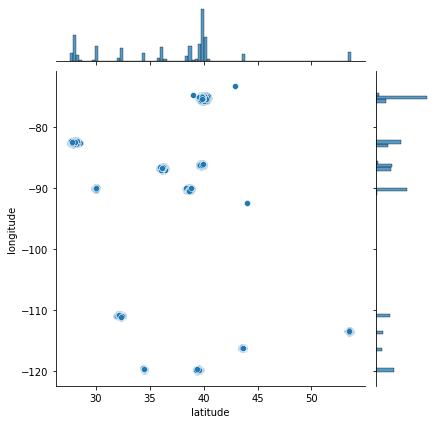

In [ ]:
sns.jointplot(data=buss_df, x='latitude', y='longitude')

We see that locations of businesses are concentrated in clusters. These clusters must be big cities.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


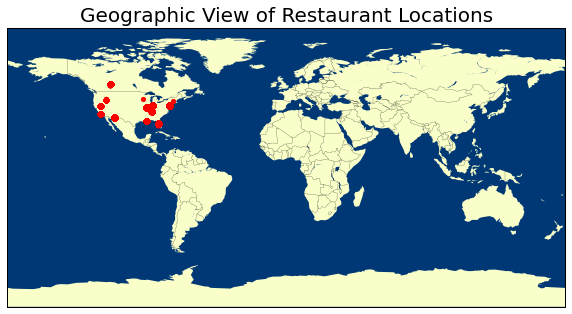

In [ ]:
# Top 10 business categories
! pip install basemap
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(10, 6))
plt.title("Geographic View of Restaurant Locations",fontsize = 20)
m=Basemap(projection='cyl', lon_0 = 0, lat_0=0, resolution='c')
m.fillcontinents(color='#FAFFCA',lake_color='#003875')
m.drawmapboundary(fill_color='#003875') 
m.drawcountries(linewidth=0.2, color="black")
m_coords = m(buss_df["longitude"].tolist(), buss_df["latitude"].tolist())
m.scatter(m_coords[0], m_coords[1], s=5, c='red', lw=3, zorder=5)

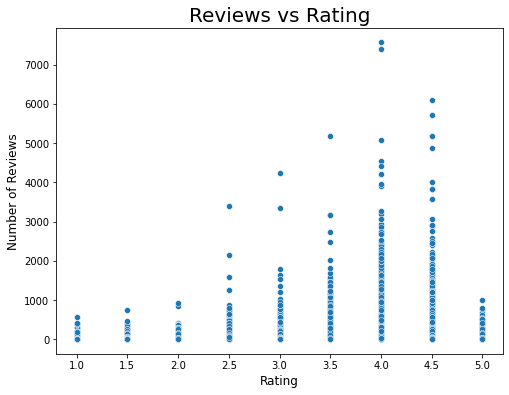

In [ ]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'stars', y = 'review_count', data = buss_df)
plt.title("Reviews vs Rating",fontsize = 20)
plt.ylabel('Number of Reviews', fontsize = 12)
plt.xlabel('Rating', fontsize = 12);

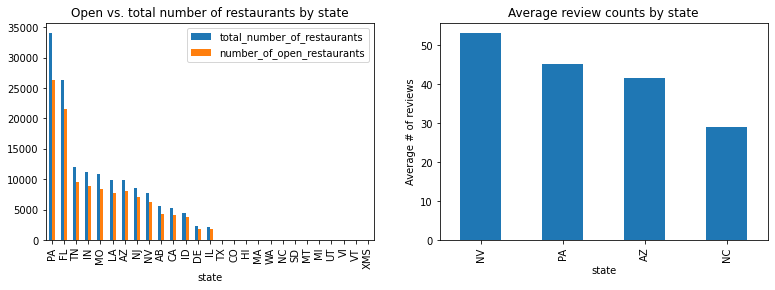

In [ ]:
plt.figure(figsize=(20,4))

# total number of restaurants vs open restaurants by state
ax1 = plt.subplot(1,3,1)
open_by_state = buss_df.groupby('state')['is_open'].agg(['count','sum']).sort_values(by=['count'],ascending=False)
open_by_state.columns = ['total_number_of_restaurants','number_of_open_restaurants']
open_by_state.plot(kind='bar',ax=ax1);
ax1.set_title('Open vs. total number of restaurants by state');

# create a groupby object based on the top five states
groupby_5state = buss_df[buss_df.state.isin(['AZ','NV','OH','NC','PA'])].groupby('state')

# average review_count by state for top five states
ax2 = plt.subplot(1,3,2)
groupby_5state['review_count'].mean().sort_values(ascending=False).plot(kind='bar', ax=ax2);
ax2.set_ylabel('Average # of reviews');
ax2.set_title('Average review counts by state');

